# TWITTER SENTIMENT CLASSIFICATION (CLIMATE CHANGE)

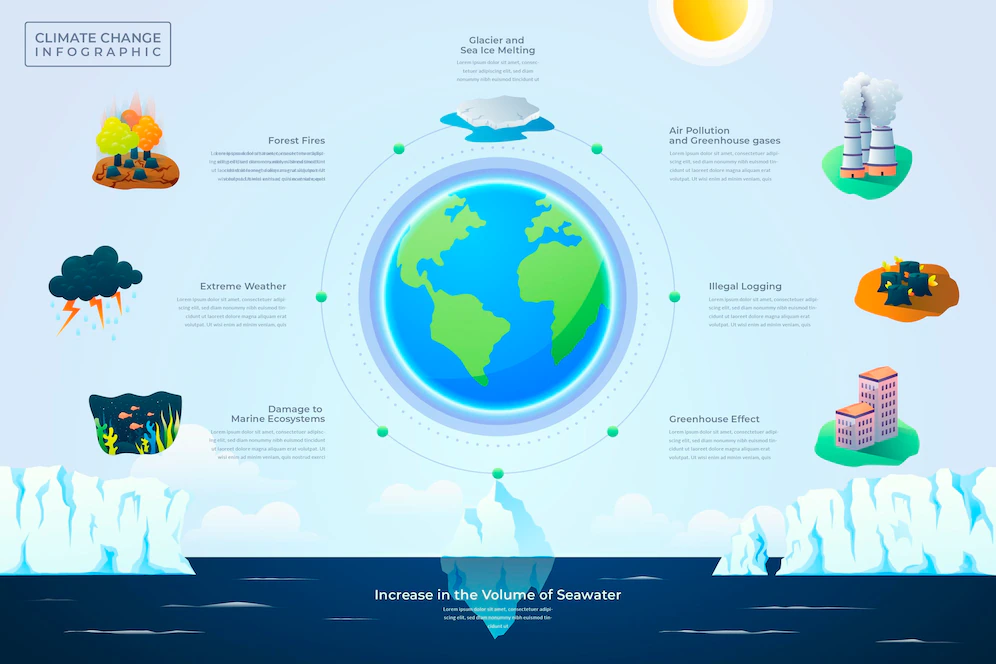

## PARBI TECH CONSULTANCY
<div class="alert alert-block alert-success">
<b> PARBI Tech Consultancy provides Data and Analytics services that enable data driven insights, well-timed and informed   decisions that consistently position the company's clients ahead of the curve.
    </div>
    

### The TEAM behind PARBI Tech Consultancy

- PARBI's tech team consist of **five Data Scientists** who work tirelessy and in unison ensuring short and effective turn around times for our clients' projects while delivering quality output for each project.

- The Tech Team consists of :
                               - Mr Alatishe Qudus
                               - Mr Bongani Mavuso
                               - Mr Isaac Ifinji
                               - Mr Peter Okeke 
                               - Ms Rumbidzai Chitongo                  


## Project Overview: 

- Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received. 




## Problem Statement

- With the overview in mind, PARVBI has been tasked to create a Machine Learning Classifier that is able to classify whether or not a person believes in climate change, based on their novel tweet data. 
- Providing an accurate and robust solution to this task will give companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.



## Data Provided

### Source of Data
- The University of Waterloo, Canada collected the data used for the project and was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

### Class Description
<div class="alert alert-warning">
<b>

- **1 (Anti)**: symbolizes a tweet that does not believe in man-made climate change. 

- **0 (Neutral)**: symbolizes a tweet that neither supports nor refutes the belief of man-made climate change

- **1 (Pro)**: symbolizes a tweet that strongly supports the belief of man-made climate change

- **2 (News)**: symbolizes a tweet that links to factual news about climate change
</div>

### Data Features

- **sentiment**: Describes which class a tweet belongs in (refer to Class Description above)

- **message**: Gives the Tweet body

- **tweetid**: Describes a Twitter's unique id

    
## Objectives
- WRITE SOMETHING !!!!
    

<a id="cont"></a>

## Table of Contents

- Our project breakdown will cover the following topics from the start to the finish. 

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
- For purposes of data manipulation and analysis, the following libraries will be imported and used in the course of this project:

     **NLTK**: A leading library for building Python programs to work with human language data providing easy-to-use interfaces
     
     **Numpy**: Used for mathematical computations on the data.
     
     **Pandas**: Can be used for data manipulation, visualisation, normalization etc.
     
     **Matplotlib**: Used for data visualization.
     
     **Seaborn**: Built upon matplotlib; used for more customizable data visualizations.
     

- For purposes of data preprocessing and model building, we will import the following packages and/or libraries:

     **Sklearn**: Used for Machine learning operations - it is a library that contains efficient tools for machine learning and statistical modeling.
---

In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set()

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, tree, ensemble
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

import urllib

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

import warnings
warnings.filterwarnings('ignore')
 

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
In this section, the train.csv and test.csv files will be loaded in a Pandas DataFrame for the notebook before prior to any anaysis. 

- The help of pandas' read_csv() method will be explored to load the data.
---

In [2]:
# Loading the train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
- The EDA phase is extremely important because it enables us to understand any patterns in our data, pinpoint any outliers and indicate relationships between variables if any. This sections will assist us to understand our data without making any assumptions. It will help provide context and guidance on the course of action to take when developing the appropriate model. For this reason, EDA is thus a vital component before we continue with the modelling phase and will assist in interpreting the results correctly allowing us a chance to understand our data fully.

-Exploring datasets helps with developing a deep understanding about the data. Before starting with the description of data, from the csv files one can easily notice that the data is already split into train and test sets. Therefore these sets wil be explored individually. This section explores all the dataframes by looking at the data types and inspecting the features contained in them, and then looks at the summary statistics of the datasets. 

-In this section, we will start by performing basic analysis which will entail:

- (a) Looking at the data sample
- (b) Finding out the number of rows and columns (plus their respective data types) in the dataset
- (c) Interogating some summary statistics for numerical columns
- (d) Checking for null values

---


### Basic Analysis

In [3]:
#finding the shape of the data
print(train.shape)
print(test.shape)

(15819, 3)
(10546, 2)


- it is noted that the train and test data consists of 15 819 rows, three columns and 10 546 rows, two columns, respectively.

The next step taken is to have a brief view into the data sets to know the names of the columns and see the how the data looks like.

In [4]:
# Looking at a sample from the train data
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
# Looking at a sample from the test data
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


- Looking at the top five rows of our train and test data, it is noted that both datasets contain raw tweet data repsective of a particular `tweetid`. All the data features can be seen as well as the types of data to work with. 

  The features of the data are: 

                            - sentiment
                            - message
                            - tweetid

- The train data contains the `sentiment` column indicating the different sentiment classes, however this column is not found in the test dataset because it is the target varaible (y-value) to be predicted by the built model. 


The types of visualisations that can be created differ depending on the data type of each variable. Broadly, more analysis will be conducted to determine whether a variable is numerical, or categorical. Currently the categorical feature is `message`, while the `sentiment` and `tweetid` features are numerical. This will be confirmed in the next step by looking specifically at the data type of each feature.


In [6]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB
None


- The info command confirmed the categorical and numerical features. If a feature (variable) is categorical the Dtype is **object** and if it is a numerical variable the Dtype is an **int64** or **float64**. This command also revealed that out of the 15819 rows in the train dataset and 10546 rows in the test dataset, none of the features contain any null values.

Null values for each feature can also be checked by using the following command:

    - df.isnull().sum()
    
This command will provide the total number of null values appearing in each feature.

In [7]:
#checking for null values in train and test data
train.isnull().any()
test.isnull().any()

message    False
tweetid    False
dtype: bool

- As observed initially above using the info command, there are no empty rows withing both datasets, meaning no null values.


Next step is to count how many of each class description is there within the train data, this will help to reveal the dormant and minority classes.

In [8]:
# checking out total number of sentiments
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

<AxesSubplot:>

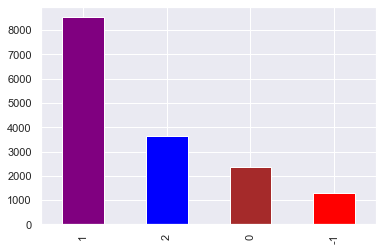

In [9]:
# plotting the total sentiment features on a bar graph
train['sentiment'].value_counts().plot.bar(color = ['purple', 'blue', 'brown','red'], 
                                              figsize = (6,4))


- The figure above shows that the pro-climate change class is more dorminant as compared to the rest of the classes with the anti-climate change class having the lowest values. 
- As a result of this, having marginally uneven classes of data will affect the precision of any classifier model in predicting the minority classes. This problem of imbalanced data will be tackled further in the Data Engineering phase before Model building. 


The next step is to briefly view data samples from each individual sentiment class separately.


<div class="alert alert-block alert-success">
<b> 'Anti' Class Data
</div>

In [10]:
# checking the sample data for the "anti" class tweets. 
train[train['sentiment'] == -1].head(10)

,sentiment,message,tweetid
28,-1,Sally Kohn’s latest evidence of climate change...,355491
46,-1,@realDonaldTrump Carbon Tax is a Globalist ide...,61141
48,-1,RT @SteveSGoddard: We had winds close to 100 M...,719523
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining ...,911385
57,-1,RT @Dawn2334Dawn: This is ONE of Arnold Schwar...,768263
107,-1,RT @Fruitloopian: Why is there snow in March i...,798585
113,-1,can someone pls explain to me why it's -37 in ...,337974
116,-1,Explain that my global warming advocates. http...,472265
121,-1,@TomiLahren kinda funny the professors talk sh...,740194
129,-1,RT @signordal: New global warming study is ter...,473664


<div class="alert alert-block alert-success">
<b>'Neutral' Class data
</div> 

In [11]:
# checking the sample data for the "neutral" class tweets.
train[train['sentiment'] == 0].head(10)

,sentiment,message,tweetid
19,0,Calum: *tweets abt reunitingish w the cast*\n-...,547924
22,0,"we also met this guy, he let us in on some tru...",67545
30,0,@Jnp_Ftw are these the same scientists that de...,365051
39,0,We’ ve dealt with simple issues like climate c...,403368
43,0,RT @andrewsharp: Win probability is bullshit m...,326916
52,0,Chris: Who is it then that initially talked ab...,352623
53,0,Do you approve of the executive order @realDon...,785637
58,0,@GlennF They are calling to the great Space Cy...,113396
64,0,RT @fuckofflaine: @jJxrry @SpaceX @QuebanJesus...,645201
67,0,RT @Hope012015: China tells Trump that climate...,687045


<div class="alert alert-block alert-success">
<b>'Pro' Class data
</div> 

In [12]:
# checking the sample data for the "pro" class tweets.
train[train['sentiment'] == 1].head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471
10,1,RT @StephenSchlegel: she's thinking about how ...,295793


<div class="alert alert-block alert-success">
<b>'News' Class data
</div> 

In [13]:
# checking the sample data for the "news" class tweets.
train[train['sentiment'] == 2].head(10)

,sentiment,message,tweetid
2,2,RT @RawStory: Researchers say we have three ye...,698562
12,2,RT @tveitdal: We only have a 5 percent chance ...,454673
14,2,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092
26,2,Bangladesh confronting climate change head on ...,365291
32,2,RT @latimes: Atmospheric rivers fueled by clim...,143471
36,2,RT @Independent: Trump's team removed climate ...,526603
41,2,2050 climate targets: nations are playing the ...,8984
44,2,RT @washingtonpost: The Alaskan tundra is fill...,905639
45,2,RT @TheTorontoSun: From @sunlorrie: Indian env...,741568
49,2,RT @Starbuck: World food supplies at risk as #...,499888


- The train dataset has few data feautures which are not substantial enough and thus makes it harder to gain a better insight into the data presented for the project. The next step is therefore to try and create numerical features from the `message` feature in an effort to use this numerical data for graphical and non-graphical EDA while gaining better understanding of the target variable's relationships with the tweet messages.


#### Creating numerical features

- A few functions will be written to help extract meaningful insights from the `message`feature which will help with performing some descriptive statistics on the data as well as create meaningful graphs.


(a) Creating a number of words column:

In [14]:
# adding a column of the count of number of words in the tweets
def add_num_of_words(df):
    
    # Create a new column named 'num_of_words'
    df['num_of_words'] = 0

    # Iterate over the rows in the dataframe
    for i, row in df.iterrows():
        # Split the message column into a list of words
        words = row['message'].split()

        # Count the number of words in the list and store the value in the new column
        num_of_words = len(words)
        df.loc[i, 'num_of_words'] = num_of_words

    return df

In [15]:
add_num_of_words(train)

,sentiment,message,tweetid,num_of_words
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19
1,1,It's not like we lack evidence of anthropogeni...,126103,10
2,2,RT @RawStory: Researchers say we have three ye...,698562,19
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18
...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,22
15815,2,RT @washingtonpost: How climate change could b...,17856,13
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,19
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,21


- Now that the column representing the count of number of words in each tweet have been added, next is to create a count of unique words.


(b) Creating a number of unique words column:

In [16]:
# adding a column of the count of number of unique words in the tweets
def add_uniquewords(df):
    uniquewords = []
    for tweet in df['message']:
        words = tweet.split(' ')
        uniquewords.append(len(set(words)))
    df['uniquewords'] = uniquewords
    return df

In [17]:
add_uniquewords(train)

,sentiment,message,tweetid,num_of_words,uniquewords
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,19
1,1,It's not like we lack evidence of anthropogeni...,126103,10,10
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,19
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,15
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,18
...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,22,22
15815,2,RT @washingtonpost: How climate change could b...,17856,13,13
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,19,19
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,21,19


- Now that the column representing the count of unique words in each tweet have been added, next is to create a count of characters.


(c) Creating a number of characters words column:

In [18]:
# adding a column of the count of number of characters in the tweets
def add_char(df):
    df['num_of_char'] = df['message'].apply(lambda x : len(x))
    return df

In [19]:
add_char(train)

,sentiment,message,tweetid,num_of_words,uniquewords,num_of_char
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,19,140
1,1,It's not like we lack evidence of anthropogeni...,126103,10,10,62
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,19,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,15,99
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,18,122
...,...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,22,22,140
15815,2,RT @washingtonpost: How climate change could b...,17856,13,13,119
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,19,19,133
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,21,19,128


- Now that the column representing the count of number of characters in each tweet have been added, next is to create a count of stopwords.


(d) Creating a number of stopwords column:

In [20]:
# adding a column of the count of stopwords in the tweets
def count_stopwords(df):
    df['stopwords'] = df['message'].apply(lambda x: len([w for w in x.split() if w.lower() in stopwords.words('english')]))
    return df

In [21]:
count_stopwords(train)

,sentiment,message,tweetid,num_of_words,uniquewords,num_of_char,stopwords
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,19,140,3
1,1,It's not like we lack evidence of anthropogeni...,126103,10,10,62,4
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,19,140,6
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,15,99,5
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,18,122,6
...,...,...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,22,22,140,7
15815,2,RT @washingtonpost: How climate change could b...,17856,13,13,119,4
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,19,19,133,4
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,21,19,128,8


- Now that the column representing the count of stopwords in each tweet have been added, next is to create a count of punctuations.


(e) Creating a number of punctuations column:

In [22]:
# adding a column of the count of number of punctuations in the tweets
def add_punc_col(df):
    punc_list = string.punctuation
    df['punctuations'] = df['message'].apply(lambda x: sum([1 for i in x if i in punc_list]))
    return df
  
add_punc_col(train)

,sentiment,message,tweetid,num_of_words,uniquewords,num_of_char,stopwords,punctuations
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,19,140,3,12
1,1,It's not like we lack evidence of anthropogeni...,126103,10,10,62,4,1
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,19,140,6,12
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,15,99,5,8
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,18,122,6,8
...,...,...,...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,22,22,140,7,11
15815,2,RT @washingtonpost: How climate change could b...,17856,13,13,119,4,10
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,19,19,133,4,9
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,21,19,128,8,4


- Now that the column representing the count of punctuations in each tweet have been added, next is to create a count of title case words.


(f) Creating a number of title-case words column:

In [23]:
# adding a column of count of number of title-case words in the tweets
def add_titlecase_column(df):
    
    #Creating a new list to store the title case words from each tweet
    titlecase = []
    
    #Looping through each row in the train dataframe
    for row in df.itertuples():
        #Splitting the tweet message into individual words
        words = row.message.split()
        #Creating a counter and setting it to 0
        count = 0
        #Looping through each word
        for word in words:
            #If the word is title case, increment the counter
            if word.istitle():
                count += 1
        #Adding the count to the titlecase_words list
        titlecase.append(count)
    
    #Adding the titlecase_words list as a new column to the train dataframe
    df['titlecase'] = titlecase
    
    #Returning the train dataframe
    return df

In [24]:
add_titlecase_column(train)

,sentiment,message,tweetid,num_of_words,uniquewords,num_of_char,stopwords,punctuations,titlecase
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,19,140,3,12,0
1,1,It's not like we lack evidence of anthropogeni...,126103,10,10,62,4,1,0
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,19,140,6,12,1
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,15,99,5,8,0
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,18,122,6,8,0
...,...,...,...,...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,22,22,140,7,11,2
15815,2,RT @washingtonpost: How climate change could b...,17856,13,13,119,4,10,1
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,19,19,133,4,9,4
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,21,19,128,8,4,6


- Now that the column representing the count of title-case words in each tweet have been added, next is to create a count of the average words length.


(g) Creating a number of average words length column:

In [25]:
# adding a column to count the average length of words in the tweets
def add_avg_word_len(df):
    df['avg_word_len'] = df['message'].apply(lambda x: np.mean([len(word) for word in x.split()]))
    return df

add_avg_word_len(train)

,sentiment,message,tweetid,num_of_words,uniquewords,num_of_char,stopwords,punctuations,titlecase,avg_word_len
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,19,140,3,12,0,6.421053
1,1,It's not like we lack evidence of anthropogeni...,126103,10,10,62,4,1,0,5.300000
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,19,140,6,12,1,6.421053
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,15,99,5,8,0,5.666667
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,18,122,6,8,0,5.833333
...,...,...,...,...,...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,22,22,140,7,11,2,5.409091
15815,2,RT @washingtonpost: How climate change could b...,17856,13,13,119,4,10,1,8.230769
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,19,19,133,4,9,4,6.052632
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,21,19,128,8,4,6,5.142857


- Now that all numerical columns have been created by desampling counts of the message feature, the next step will be to perform univariate analysis and multivariate analysis on the numerical features in the data.


## Univariate Analysis (Non-graphical)

- The first univariate analyses will be non-graphical. This section will look at the descriptive statistics for each feature. The descriptive statistics for each numerical feature by will be computed using the following command:
             
                                             - df.describe()
               
- This command will provide the mean, standard deviation and a five number summary of each numerical feature. The five number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum) is also used for creating the box plot. The three measures for central tendency are the mode, mean and median. The command to determine the mode is:

                                             - df.mode()

In [26]:
# checking the discriptive statistics
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.000000,1.000000,1.000000,1.000000,2.00
tweetid,15819.0,501719.433656,289045.983132,6.000000,253207.500000,502291.000000,753769.000000,999888.00
num_of_words,15819.0,17.685062,4.443909,2.000000,15.000000,18.000000,21.000000,31.00
uniquewords,15819.0,17.112144,4.124631,2.000000,14.000000,18.000000,20.000000,30.00
num_of_char,15819.0,123.774132,23.332433,14.000000,114.000000,133.000000,140.000000,208.00
stopwords,15819.0,5.163221,2.925278,0.000000,3.000000,5.000000,7.000000,18.00
punctuations,15819.0,7.504141,3.447935,0.000000,5.000000,7.000000,10.000000,58.00
titlecase,15819.0,2.032303,1.540421,0.000000,1.000000,2.000000,3.000000,13.00
avg_word_len,15819.0,6.254392,1.238497,3.333333,5.363636,6.052632,6.941176,31.75


- Additional statistical measures that can be calculated are **kurtosis** and **skew**. 

Both `kurtosis` and `skew` are important statistical terms in data science. `Kurtosis` is the measure of outliers present in the data. **High kurtosis (>3)** indicates a large number of outliers while **low kurtosis (<3)** a lack of outliers.  Skew will indicate how symmetrical the data is, in other words it shows how the data is distributed. Below is a table that explains the range of values with regards to skew.


|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 



The commands used to determine the skew and kurtosis of data are:

        - df.skew()
        - df.kurtosis()

In [27]:
# checking for any outliers
train.kurtosis()

sentiment        0.122976
tweetid         -1.193356
num_of_words    -0.185399
uniquewords     -0.038303
num_of_char      1.721987
stopwords       -0.370223
punctuations     3.040057
titlecase        1.790924
avg_word_len    12.714517
dtype: float64

In [28]:
# checking the skewness of data
train.skew()

sentiment      -0.683959
tweetid        -0.008471
num_of_words   -0.400580
uniquewords    -0.467207
num_of_char    -1.412224
stopwords       0.432993
punctuations    0.526795
titlecase       1.086097
avg_word_len    1.365597
dtype: float64

- Results show that there are no outliers in all numerical features except for the avg_word_len feature. 

- Looking at the distribution of data, the tweetid, num_of_words, num_of_uniquewords, num_of_stopwords and num_of_punctuations are observed to be fairly symmetrical. On the other hand, the sentiment feature is moderately negatively skewed while features involving the num_of_char, num_of_titlecase and avg_word_len have high negative and high positive features respectively. 

Now that all the non-graphical univariate analysis has been conducted, the best way to collaborate these findings is by creating some visuals for the data, enabling an enhanced understanding of the data distributions and behaviours.


## Univariate Analysis (Graphical)

Several plots can be applied to look at the distribution of any numerical feature and some of such plots include the following:

                - histogram
                - density plot
                - box plot
                - violin plot

- In this project the visuals will be reserved to the histogram and density plots. The Matplotlib library will be used to display the histogram and density plots. A list of all the numerical features will be created at the same time. 


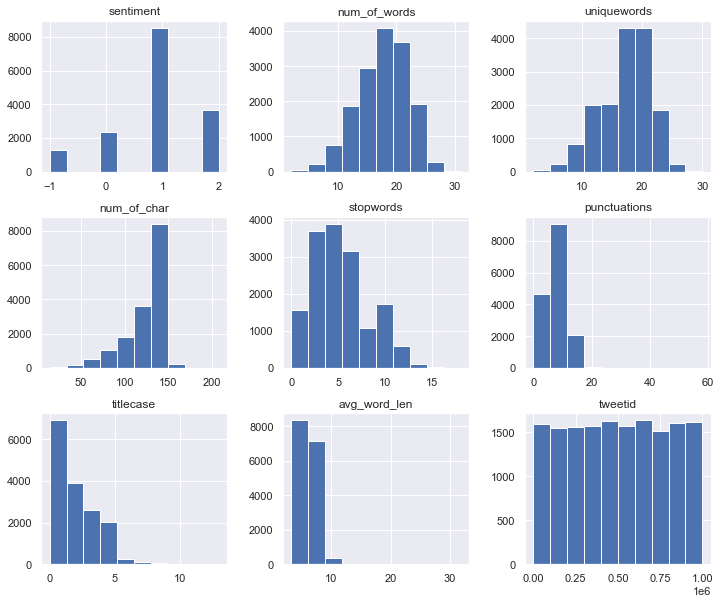

In [29]:
# creating a list of all numerical features
features = ['sentiment', 'num_of_words', 'uniquewords', 'num_of_char', 'stopwords', 'punctuations', 'titlecase', 'avg_word_len', 'tweetid']
train[features].hist(figsize = (12,10));

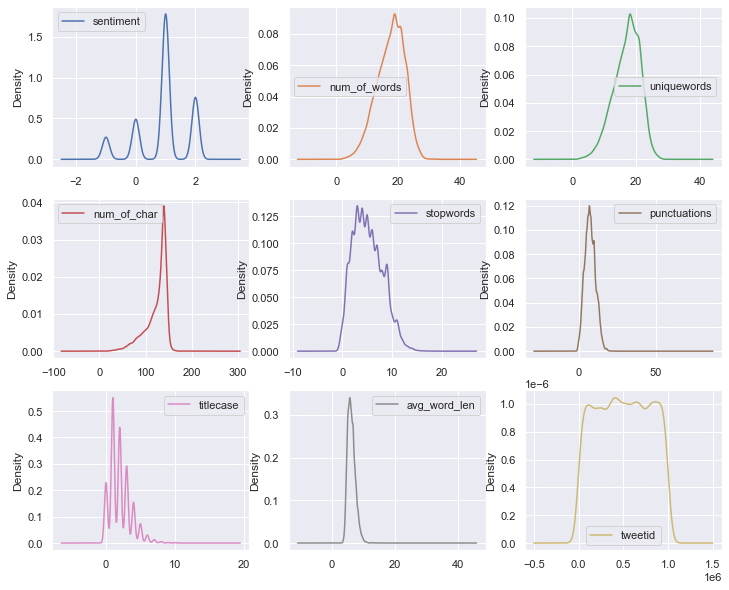

In [30]:
train[features].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(12, 10));

- We can clearly see that both the histogram and density plot display the same information and the distribution of the data tallies with the summaries of the descriptive statistics performed previously. The density plot can be considered a smoothed version of the histogram and does not depend on the size of bins.

- The next graphical plot will involve Box Plots. The seaborn library will be used to create Box Plots on all numeric features. 
- We can visualise all numerical features simultaneously. 


### Creating Visuals from target variable vs indivual numerical column.

WORK ON FIGURING OUT HOW TO PLOT THESE!!!!!



### Multivariate Analysis: Non-Graphical 

- This analysis helps to determine the relationship between any two numerical features by calculating the correlation coefficient. Correlation is a measure of the degree to which two variables change together, if at all. If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases and vive versa. There are three different correlation measures:

    - Pearson correlation 
    - Spearman rank correlation
    - Kendall correlation

For this project, the Pearson correlation will be employed for analysis. The Pearson correlation measures the linear relationship between features and assumes that the features are normally distributed. Below is a table that explains how to interpret the Pearson correlation measure:


|   Pearson Correlation Coefficient (r)  |       Description of Relationship     |
|:-------------------|:---------------:|
|  r = -1              |Perfect Negative Correlation |
| -1 < r < -0.8 | Strong Negative Correlation  | 
| - 0.8 < r < -0.5             | Moderate Negative Correlation  | 
|       - 0.5 < r < 0     |Weak Negative Correlation  | 
|       r = 0  |No Linear Correlation | 
| 0 < r < 0.5 | Weak Positive Correlation  | 
| 0.5 < r < 0.8             | Moderate Positive Correlation  | 
|       0.8 < r < 1     |Strong Positive Correlation  | 
|       r = 1  |Perfect Positive Correlation | 



The command we will use to determine the correlation between features is:

                    - df.corr()

In [31]:
train.corr()

,sentiment,tweetid,num_of_words,uniquewords,num_of_char,stopwords,punctuations,titlecase,avg_word_len
sentiment,1.000000,-0.003758,-0.127068,-0.108296,0.052893,-0.226360,0.192352,0.051128,0.254452
tweetid,-0.003758,1.000000,0.005321,0.008405,0.005774,0.004389,-0.001915,0.007896,-0.009794
num_of_words,-0.127068,0.005321,1.000000,0.975836,0.781325,0.757346,-0.091977,0.238636,-0.657610
uniquewords,-0.108296,0.008405,0.975836,1.000000,0.782994,0.717898,-0.075777,0.242937,-0.627771
num_of_char,0.052893,0.005774,0.781325,0.782994,1.000000,0.410358,0.326735,0.221695,-0.091071
stopwords,-0.226360,0.004389,0.757346,0.717898,0.410358,1.000000,-0.280493,0.025233,-0.682284
punctuations,0.192352,-0.001915,-0.091977,-0.075777,0.326735,-0.280493,1.000000,0.070910,0.503361
titlecase,0.051128,0.007896,0.238636,0.242937,0.221695,0.025233,0.070910,1.000000,-0.134879
avg_word_len,0.254452,-0.009794,-0.657610,-0.627771,-0.091071,-0.682284,0.503361,-0.134879,1.000000


From the correlation table, it is noted that there exist a strong positive correlation between num_of_words and uniquewords. A  few more columns are noted to exhibit moderate positive correlations and these features include:
  - num_of char & num_of_words
  - stopwords & num_of_words
  - num_of_char & uniquewords 
  - stopwords & uniquewords

- The positive correlations observed help to shade more light on the tweet data involved in this project and these correlations happen to make sense. As explained in the introductory section of correlation, positive correlation implies that as one feature increases, the correlated one also increases. This is true in the case of how an increase in the numbe of words will also lead to an increased number of unique words. The same applies for increased number of words resulting in an icreased number of characters and stopwords. 
- On the contrast, moderate negative correlations were observed among the following features:

   - avg_word_len & num_of_words
   - avg_word_len & uniquewords 
   - avg_word_len & stopwords 
 
- Moderate negative correlations imply that when one feature increases the correlated feature moderately decreases. This result implies that any increase in the number of words, number of unique words or number of stopwords would result in a moderate decreased value in the average word length. The remaining features showed weak correlations.
 
 
### Multivariate Analysis: Graphical
- For the multivariate graphical analysis there are several visualisations that can be considered:

        - Heatmap
        - Scatter Plot
        - Pair Plot
        - Joint Plot
        - Bubble Plot

#### Heatmap
- Similar to the correlation table, the relationship between features can also be displayed graphically using a heatmap. The Seaborn library will be used for this basic heatmap visualisation.

- The correlation coefficient value will be displayed on the heatmap using the vmin and vmax parameters.

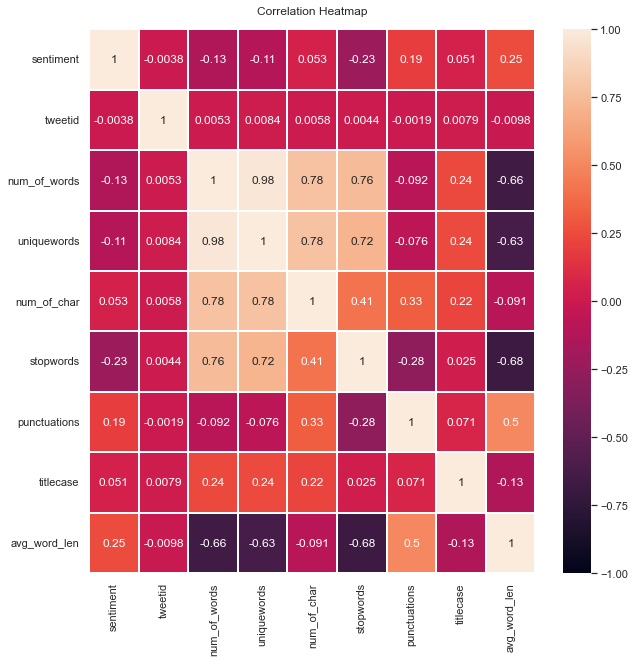

In [32]:
#specifying the size of the heatmap
fig, ax = plt.subplots(figsize=(10, 10))

#creating the heatmap
heatmap = sns.heatmap(train.corr(), linewidths=.3, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=15);

- Similar to the correlation relationships found earlier, the heatmap shows features exhibiting strong positive correlations in white boxes while moderate positive correlating features are in dusty pink boxes. Found in the purple boxes are the moderate negative correlating features. The weak correlations are indicated by orange, red and pink boxes. 


#### Word Frequencies

In the next section, before the raw data is cleaned, visuals to show the most frequently used generally by all classes will be plotted, with an aim to help get an understanding of the data better and be able to notice any valuable changes even after data cleaning. 



Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

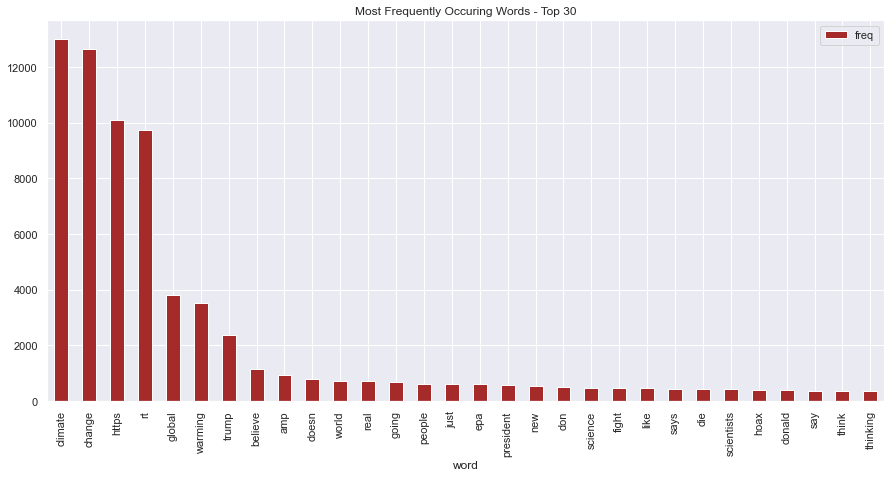

In [33]:
## checking the frequency distribution of each word in the train data using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer


cvector = CountVectorizer(stop_words = 'english')
words = cvector.fit_transform(train.message)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cvector.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'brown')
plt.title("Most Frequently Occuring Words - Top 30")


- The visual above shows the top 30 frequently used words in the tweets. From these words, `climate`, '`change`, `https` and `rt` are the highly used words ranging from counts of 9800 anf above. The **Data Engineering** will clean uo the tweet data and remove all noise and ounctuation errors from the data including words such as `https` and `rt`. Another word frequency check will be conducted after data cleaning to compare to the visual above. 


### Extracting Hashtags
- Next step is to extract hashtags fro  the message feature and plot the most frequently used hashtags in each sentiment class respectively.

The hashtags were extracted using the function below:


In [34]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [35]:
# extracting hashtags from anti climate change sentiment
HT_anti = hashtag_extract(train['message'][train['sentiment'] == -1])

# extracting hashtags from neutral on climent change sentiment
HT_neutral = hashtag_extract(train['message'][train['sentiment'] == 0])

# extracting hashtags from pro climent change sentiment
HT_pro = hashtag_extract(train['message'][train['sentiment'] == 1])

# extracting hashtags from news on climent change sentiment
HT_news = hashtag_extract(train['message'][train['sentiment'] == 2])

# unnesting list
HT_anti = sum(HT_anti, [])
HT_neutral = sum(HT_neutral, [])
HT_pro = sum(HT_pro, [])
HT_news = sum(HT_news, [])

The distributions of the frequently used hashtags respective of each class will not be plotted below.

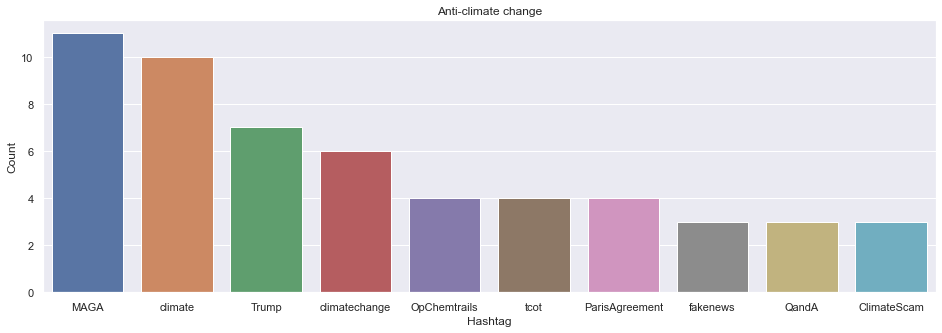

In [36]:
a = nltk.FreqDist(HT_anti)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Anti-climate change")
plt.show()

- The three commonly used hashtags in the `anti` class are as follows MAGA > climate > Trump. 

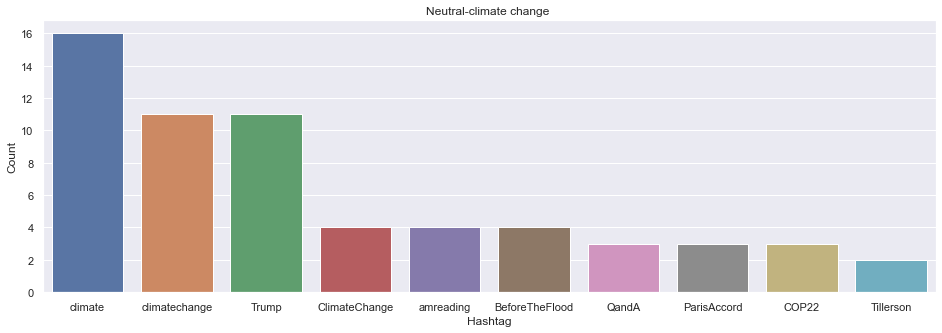

In [37]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Neutral-climate change ")
plt.show()

- The three commonly used hashtags in the `neutral` class are as follows climate > climatechange > Trump. From this visual it can also be noted that the `climatechange` and `ClimateChange` words are being interpreted to be different (hence appearing in separate bins) even though they mean the same thing. This issue willbe resolved in **Data Engineering**.

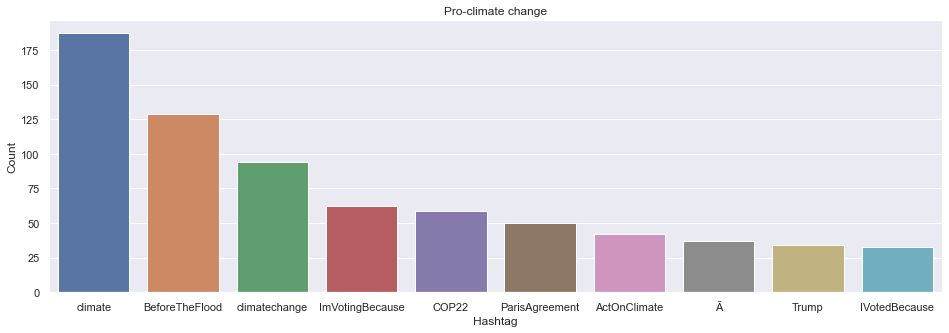

In [38]:
a = nltk.FreqDist(HT_pro)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Pro-climate change")
plt.show()

- The three commonly used hashtags in the `pro` class are as follows climate > BeforeTheFlood > climatechange. 

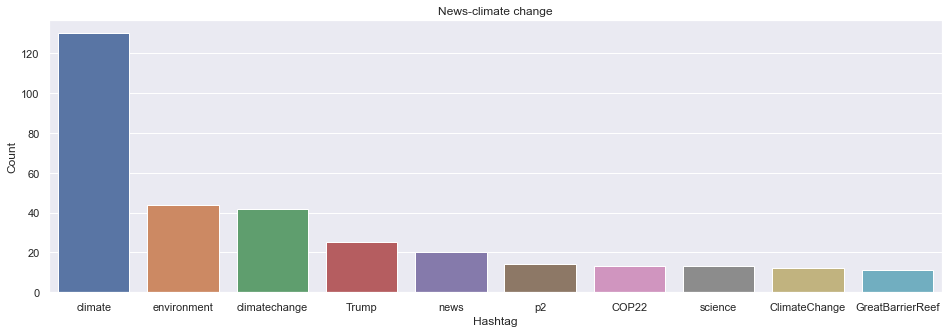

In [39]:
a = nltk.FreqDist(HT_news)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("News-climate change")
plt.show()


- The three commonly used hashtags in the `news` class are as follows climate > environment > climatechange. From all the classes, an interesting observation was to note how the `pro` was the only class much less political having the Trump hashtag sitting in the ninth position as compared to the third and fourth positions in the other classes. 

Another better way to visualize the distribution of the most frequently used words in each class separately is by making use of Word Cloud. Word cloud or tag cloud is a visual representation of word frequency that gives greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s). Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.


### WordCloud
    

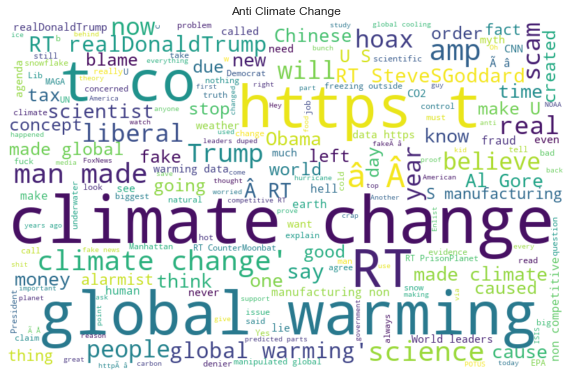

In [40]:
# importing wordcloud
from wordcloud import WordCloud

# checking the normal words used by Anti climate change messages using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == -1]])

wordcloud = WordCloud(background_color = 'white',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Anti Climate Change')
plt.show()




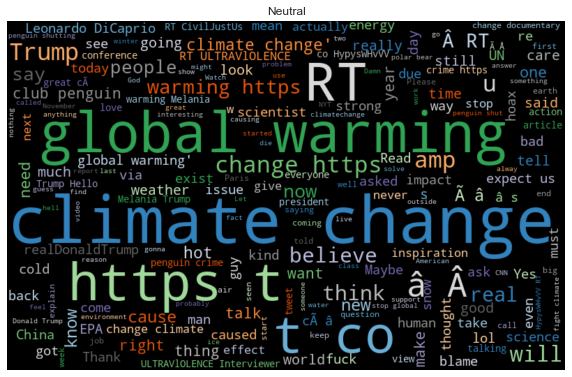

In [41]:
# checking the naumal words used by Neutral messages using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 0]])

wordcloud = WordCloud(colormap='tab20c',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Neutral')
plt.show()

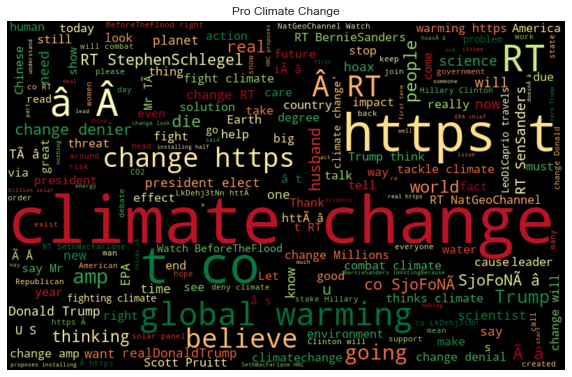

In [42]:
# checking the normal words used by Pro Climate Change using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 1]])

wordcloud = WordCloud(colormap='RdYlGn',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Pro Climate Change')
plt.show()


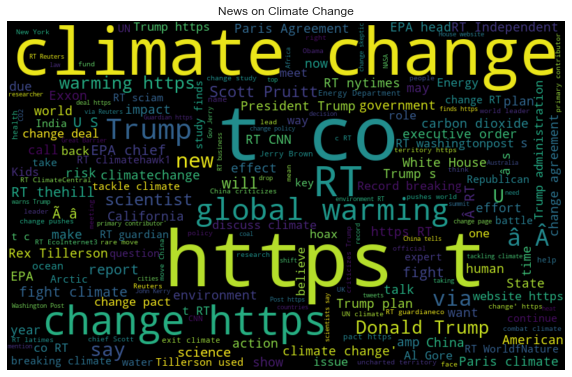

In [43]:
# checking the normal words used by News on Climate Change using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 2]])

wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('News on Climate Change')
plt.show()


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
In Data Science, the performance of the model is dependent on data preprocessing and data handling. Suppose if we build a model without handling data, we got an accuracy of around 70%. By applying the Feature engineering on the same model there is a chance to increase the performance from 70% to more. Simply, by using Feature Engineering we improve the performance of the model.

- In this section, we will focus on two key things:

- (1) Text cleaning
- (2) Text feature extraction



### Text Cleaning

One of the most common tasks in Natural Language Processing (NLP) is to clean text data. In order to maximize results, it is important to distill text data to the most important root words in the corpus. Text cleaning refers to the process of of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. In other words it involves transforming text into a more digestible form so that machine learning algorithms can perform better. This process often requires multiple steps and various techniques for producing suitable text data. Properly cleaned data will help us to do good text analysis and help us in making accurate decisions for our business problems. Hence text preprocessing for machine learning is an important step. 


This Text Cleaning section will broken down into subsections that will focus on various ways of cleaning text. The subsetcions will follow the sequence below:
 -  Removing Noise
 -  Spell checking
 -  Tokenization
 -  Lemmatization
 -  Stopwords
  


#### Removing Noise 

In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format. This process is critical to removing text and characters that are not important to the analysis. 

Text such as URLs, noncritical items such as hyphens or special characters, web scraping, HTML, and CSS information are discarded. Some techniques are standard, but our own data requires some creative thinking on our part. 

For the train dataset we will be doing the following steps: making everything lower case, performing spelling check, removing the web-urls, removing text before colons, removing words starting with "@" and "#", removing punctuations and removing printables.

*A brief look into the uncleaned data will be shown below for reference sake durig data cleaning.*



In [44]:
train['message'].head(4)

0    PolySciMajor EPA chief doesn't think carbon di...
1    It's not like we lack evidence of anthropogeni...
2    RT @RawStory: Researchers say we have three ye...
3    #TodayinMaker# WIRED : 2016 was a pivotal year...
Name: message, dtype: object

In [45]:
test['message'].head(4)

0    Europe will now be looking to China to make su...
1    Combine this with the polling of staffers re c...
2    The scary, unimpeachable evidence that climate...
3    @Karoli @morgfair @OsborneInk @dailykos \nPuti...
Name: message, dtype: object

<div class="alert alert-block alert-success">
<b> Transforming to Lower Case
</div> 


In [46]:
# transforming the train data to lower case

train['message'].str.lower()

# transforming the test data to lower case
test['message'].str.lower()

0        europe will now be looking to china to make su...
1        combine this with the polling of staffers re c...
2        the scary, unimpeachable evidence that climate...
3        @karoli @morgfair @osborneink @dailykos \nputi...
4        rt @fakewillmoore: 'female orgasms cause globa...
                               ...                        
10541    rt @brittanybohrer: brb, writing a poem about ...
10542    2016: the year climate change came home: durin...
10543    rt @loop_vanuatu: pacific countries positive a...
10544    rt @xanria_00018: you’re so hot, you must be t...
10545    rt @chloebalaoing: climate change is a global ...
Name: message, Length: 10546, dtype: object

<div class="alert alert-block alert-success">
<b> - All messages have been converted to lower case successfully in both train and test datasets. Next step is to perform some spelling check through the text data.
    
    
    Spelling Check
</div> 

<div class="alert alert-block alert-success">
<b> Removing Web-URLs
</div> 

In [47]:
#removing noise and replacing with 'web-urls' in the train data set 

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = 'web-urls'
train['message'] = train['message'].replace(to_replace = pattern_url, 
                                            value = subs_url, regex = True)


#removing noise and replacing with 'web-urls' in the test dataset 

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = 'web-urls'
test['message'] = test['message'].replace(to_replace = pattern_url, 
                                            value = subs_url, regex = True)

In [48]:
train['message'].iloc[26]

'Bangladesh confronting climate change head on web-urls web-urls'

In [49]:
test['message'].iloc[19]

"Record-breaking climate change pushes world into 'uncharted territory' - The Guardian web-urls"


<div class="alert alert-block alert-success">
<b> - The website links have been successfully replaced with `web-urls` in the train and test data.

    
    Removing Text before and inclusing the colon
</div> 

In [50]:
# removing text before and including the colon (:) from the train data

train['message'] = train['message'].replace(r'^.+:', '', regex=True)

# removing text before and including the colon (:) from the test data

test['message'] = test['message'].replace(r'^.+:', '', regex=True)

In [51]:
train['message'].iloc[2]

' Researchers say we have three years to act on climate change before it’s too late web-urls web-urls…'


<div class="alert alert-block alert-success">
<b> - The colons and words before colons have been successfully removed in the train and test data.

    
    Removing words that start with `@` 
</div>

In [52]:
# removing words that starts with '@' from the train data

pattern = r'@\w+'
subs = ''
train['message'] = train['message'].replace(to_replace = pattern, 
                                            value = subs, regex = True)

# removing words that starts with '@' from the test data

pattern = r'@\w+'
subs = ''
test['message'] = test['message'].replace(to_replace = pattern, 
                                            value = subs, regex = True)

In [53]:
train['message'].iloc[3]

' 2016 was a pivotal year in the war on climate change web-urls'


<div class="alert alert-block alert-success">
<b> - The words that started with `@` have been successfully removed in the train and test data.
    
    
    Removing words that starts wuth `#`
</div>

In [54]:
# removing words that starts with '#' from the train data

patt = r'#\w+'
sub = ''
train['message'] = train['message'].replace(to_replace = patt, 
                                            value = sub, regex = True)

# removing words that starts with '#' from the test data
patt = r'#\w+'
sub = ''
test['message'] = test['message'].replace(to_replace = patt, 
                                            value = sub, regex = True)



<div class="alert alert-block alert-success">
<b> - The words that started with `#` have been successfully removed in the train and test data. Next step is to create a function that can remove punctuation from that data

    
    Remove Punctuation
</div>


In [55]:
#creating a function that removes punctuation from the data frame
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])


In [56]:
# removing punctuation from the train data 
import string

train['message'] = train['message'].apply(remove_punctuation)


# removing punctuation from the test data 

test['message'] = test['message'].apply(remove_punctuation)


In [57]:
train['message'].iloc[268]

'  thinks human impact on climate change “subject to continued debate” It’s not  weburls…'

<div class="alert alert-block alert-success">
<b> Punctuations have been successfully reoved. The next step is to remove Next step is to remove all printables from the data.
    
    Removing Printables
</div> 



In [58]:
from string import printable

# removing all ascii characters and printables from the train data using printable module
st = set(printable)
train['message']= train['message'].apply(
    lambda x: ''.join(["" if  i not in  st else i for i in x]))

# removing all ascii characters and printables from the test data using printable module
test['message']= test['message'].apply(
    lambda x: ''.join(["" if  i not in  st else i for i in x]))


In [59]:
train['message'].iloc[268]

'  thinks human impact on climate change subject to continued debate Its not  weburls'

<div class="alert alert-block alert-success">
<b> - All printables have been removed from messages successfully in both train and test datasets. Next step is to tokenize the text data. 

</div> 

### Tokenisation

Tokenization breaks the text into smaller sequences of tokens,  which roughly correspond to "words" versus large chunks of text. The reason for tokenization is because a machine cannot understand sentences or words until they’re separated. Special care has to be taken when breaking down terms so that logical units are created. Most software packages handle edge cases (U.S. broke into the US and not U and S), but it’s always essential to ensure it’s done correctly.

- For this project the TreebankWordTokenizer will be used to make the data ready for analysis. 

In [60]:
# tokenizing the words present in the train data
tokeniser = TreebankWordTokenizer()

train_tokens = train['message'].apply(tokeniser.tokenize)

# tokenizing the words present in the test data
test_tokens = test['message'].apply(tokeniser.tokenize)


In [61]:
print(train_tokens.head(2))
print(test_tokens.head(2))

0    [PolySciMajor, EPA, chief, doesnt, think, carb...
1    [Its, not, like, we, lack, evidence, of, anthr...
Name: message, dtype: object
0    [Europe, will, now, be, looking, to, China, to...
1    [Combine, this, with, the, polling, of, staffe...
Name: message, dtype: object


<div class="alert alert-block alert-success">
<b> - From the results above it shows that the text data has been successfully tokenized. The next step will be to perform lemmatization. 

</div>

### Lemmatization

Lemmatization is the process of grouping words of similar meaning together. So, the root stem, meaning the word one will end up with, is not something that can be looked up in a dictionary, but one can look up a lemma.


Stemming is a similar process to lemmatizing, except it works by removing characters from the beginning or end of a word to reduce it to their stem. An example of stemming would be to reduce “runs” to “run” as the base word dropping the “s,” where “ran” would not be in the same stem. However, Lemmatization would classify “ran” in the same lemma.

For this reason, our project will favour Lemmatization over Stemming and the WordNetLemmatizer will be used for the process.

In [62]:
lemmatizer = WordNetLemmatizer()

In [63]:
# creating a lemmatization function
def data_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]  

In [64]:
# lemmatizing the words in the train data
train_lemma = train_tokens.apply(data_lemma, args=(lemmatizer, ))

In [65]:
train_lemma

0        [PolySciMajor, EPA, chief, doesnt, think, carb...
1        [Its, not, like, we, lack, evidence, of, anthr...
2        [Researchers, say, we, have, three, year, to, ...
3        [2016, wa, a, pivotal, year, in, the, war, on,...
4        [Its, 2016, and, a, racist, sexist, climate, c...
                               ...                        
15814                                                   []
15815    [How, climate, change, could, be, breaking, up...
15816    [What, doe, Trump, actually, believe, about, c...
15817    [Hey, liberal, the, climate, change, crap, is,...
15818    [s, climate, change, equation, in, 4, screensh...
Name: message, Length: 15819, dtype: object

In [66]:
# lemmatizing the words in the test data
test_lemma = test_tokens.apply(data_lemma, args=(lemmatizer, ))

<div class="alert alert-block alert-success">
<b> Now that the data tokens have been successfully lemmazited, the next step will be to remove stop words for the data. 


    Stop Words

Stop words are common words that appear but do not add any understanding or contain important significance to be used in Search Queries. Words such as “a” and “the” are examples. These words also appear very frequently, become dominant in analysis, and obscure the meaningful words. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information. MLTK has a corpus of stopwords. 

All stop words will be removed from the train and test datasets in the following functions.

</div>

In [67]:
# removing stop words from the train data 
train_words = []

for i in range(0, 15819):
    update = re.sub('[^a-zA-Z]', ' ', train['message'][i])
    update = update.lower()
    update = update.split()
    
    lemmatizer = WordNetLemmatizer()
  
  # lemmatizing 
    update = [lemmatizer.lemmatize(word) for word in update if not word in 
              set(stopwords.words('english'))]
  
  # joining them back with space
    update = ' '.join(update)
    train_words.append(update)

In [68]:
# removing stop words from the test data 
test_words = []

for i in range(0, 10546):
    update = re.sub('[^a-zA-Z]', ' ', test['message'][i])
    update = update.lower()
    update = update.split()
    
    lemmatizer = WordNetLemmatizer()
  
  # lemmatizing 
    update = [lemmatizer.lemmatize(word) for word in update if not word in 
              set(stopwords.words('english'))]
  
  # joining them back with space
    update = ' '.join(update)
    test_words.append(update)



<div class="alert alert-block alert-success">
<b> Now that the first major section of Text Cleaning is done and sorted, the next main step will be to perform Text Feature Extraction. 
</div>
    
## Text feature extraction

<div class="alert alert-block alert-success">
<b> 
Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect dictionary style feature sets, so we must therefore transform our text into a dictionary. The Bag of Words model is the simplest method; it constructs a word presence feature set from all the words in the text, indicating the number of times each word has appeared.


     Bag of words
 
</div>

In [69]:
# creating bag of words for the train data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500, ngram_range=(1, 4))
x = cv.fit_transform(train_words).toarray()
y = train.iloc[:,0]


In [70]:
# creating bag of words for the test data
count_vect = CountVectorizer(max_features =2500, ngram_range=(1, 4))
test_data = count_vect.fit_transform(test_words).toarray()

<div class="alert alert-block alert-success">
<b> - Now that bags of words have been successfully created in both train and test dataset, next step is to compute the IDF values by calling tfidf_transformer.fit(x) on the word counts we computed earlier. 
</div>

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer 


In [72]:
# for the train data
tfidf = TfidfTransformer(smooth_idf=True,use_idf=True) 
x = tfidf.fit(x)

In [73]:
# for the test data
test_data = tfidf.fit(test_data)

In [74]:
# count matrix for train data
count_vector = cv.transform(train_words).toarray()
# tf-idf scores 
x = tfidf.transform(count_vector)


In [75]:
# count matrix for test data
test_vector = count_vect.transform(test_words).toarray()
# tf-idf scores 
test_data = tfidf.transform(test_vector)

In [76]:
## y = train.iloc[:,0]
## x = train_words

<div class="alert alert-block alert-success">
    
<b> With the IDF values computed, the data will need to be balanced. 
    
    
Earlier during EDA, it was proven via a bar plot that the data among the four classes of interest was not balanced, the `pro` class had the highest data values as compared to the other clases. Having a balanced data set for a model would generate higher accuracy models, higher balanced accuracy and balanced detection rate. Hence, its important to have a balanced data set for a classification model. Balancing a dataset makes training a model easier because it helps prevent the model from becoming biassed towards one class. In other words, the model will no longer favour the majority class just because it contains more data

    
There are several ways to resolve the problems of imbalanced data such as undersampling, oversampling or using the Synthetic Minority Oversampling Technique (SMOTE) method. SMOTE is a statistical technique for increasing the number of cases in your dataset in a balanced way. It is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. This balancinf technique will be applied in this project. 

    
    Balancing the Data
</div>




In [77]:
# half the number of the majority class (pro climate change)
# total observation of the pro climate change class devided by two


from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [78]:
# Define SMOTE-Tomek Links
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x, y = resample.fit_resample(x, y)


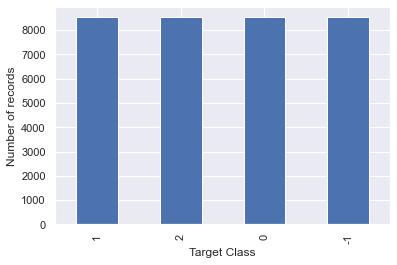

In [79]:
# The balanced dataset

import matplotlib.pyplot as plt
count = y.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

<div class="alert alert-block alert-success">
<b> The figure shows an evenly distributed dataset in contrast to the starting data sample shown in the EDA section. Next step is to scale the data by standardization as a way of handling the outliers.
    
    
      Standardization
</div>





In [79]:
# standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x = scaler.fit_transform(x)(with_mean=False)
scaled_x



# scaling the testdata
scaled_test = scaler.fit_transform(test_data)
scaled_test

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

<div class="alert alert-block alert-success">
<b> Now that the data is scaled, the next step will be to split the train data into train datasets and validation datasets.
    

It is very important to validate the machine before making final predictions as this helps to see how well the machine is behaving by giving accuracy and precision results. This validation result step will assist in situations of hyperparameter tuning if there is a need. 

      Split the Data
</div>  




In [80]:
# spliting the dataset
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x , y, 
                                                    test_size = 0.20, random_state = 50)

print(x_train.shape)  # this data will be used to train the model
print(x_valid.shape)  # this data will be used to validate the model
print(y_train.shape)  # this data will be used to train the model
print(y_valid.shape)  # this data will be used to do validation predictions 

(27292, 2500)
(6823, 2500)
(27292,)
(6823,)


In [81]:
# standardization of train, validation and test data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)             # all these datasets are for training and validating the model
x_test = scaler.transform(x_test)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

<div class="alert alert-block alert-success">
<b> WIth the data successfully split into train and validation datasets, the next step will be to play around with class weights. Specifying class weights in the original dataset while buiding a machine learning model is an alternative to the balancing methis employed earlier. This permits the algorithm to give more importance to minority classes. Class weights can be calculated through the class_weight() function of the sklearn.utils library.


     Play with class weights 
</div>

In [81]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
cw = compute_class_weight(class_weight= 'balanced',
                          classes = np.unique(y_train),
                          y = y_train)
weights = dict(zip(classes, cw))
weights


{-1: 0.9954770936679311,
 0: 1.0050081013404035,
 1: 0.9982443306510607,
 2: 1.0013208100968594}


<div class="alert alert-block alert-success">
<b> Now it will be easier to provide the class weights as input to a classifier, for example a DecisionTreeClassifier, and calculate the performance of the model. 

    
With the data now in a format that a machine learning model can understand, in other words the data is now ready for model training. The process of training various models will now begin in the next phase. 
</div>


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
To make predictions for the target variable, `sentiment`, we will create five regression models in the listed order:

**Logistic Regression** : Serves as the base model, and  it uses a logistic function to model the dependent variable. 

**KNeighbors Classifier**: works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

**Decision Tree Classifier**: A model that works by partitioning data into subsets using recursive binary splitting such that the resulting subset has minimised Mean Square Error. 

**SVC** : works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes

**Random Forest Classifier** : It is an ensemble bagging model based on decision trees that works by training on different subsets of the same data with an aim of reducing variance error.  


All models will be trained by following the same procedure as highlited in the following steps:
- 1. A classifier model object will be created.

- 2. The model will get fit to the training dataset.

- 3. Predictions will be made by the model using the validation dataset.



### 5.1. Logistic Regression 


f1 score : 0.6967609555913821
[[1098  285  197   91]
 [ 155 1136  258  192]
 [ 112  192 1097  294]
 [  44   96  153 1423]]


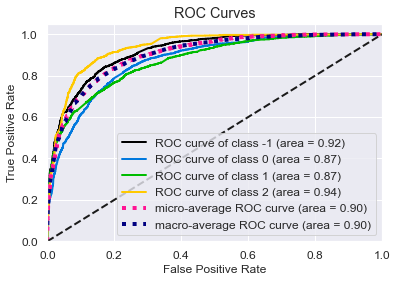

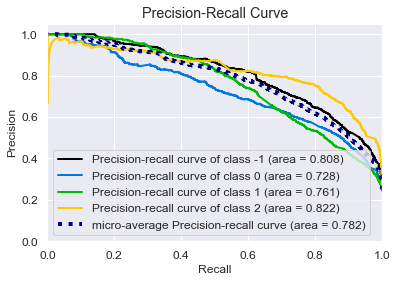

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight = weights, multi_class='ovr')
lr.fit(x_train, y_train)

y_score = lr.predict_proba(x_valid)
y_pred_lr = lr.predict(x_valid)


# calculating the f1 score for the x_test set
print("f1 score :", f1_score(y_valid, y_pred_lr,
                            pos_label='positive',
                             average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred_lr)
print(cm)


# Plot metrics 
plot_roc(y_valid, y_score)
plt.show()
    
plot_precision_recall(y_valid, y_score)
plt.show()


####  comment on the result!!!!



### 5.2 KNeighbors Classifier



f1 score : 0.6944159460647809
[[1536   79   13   43]
 [ 292 1305   37  107]
 [ 374  474  516  331]
 [ 133  133   69 1381]]


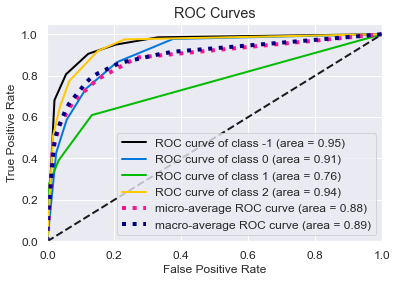

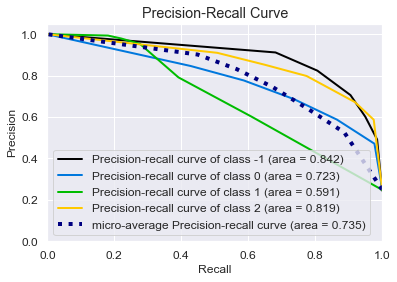

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

y_score = knc.predict_proba(x_valid)
y_pred_knc = knc.predict(x_valid)

# calculating the f1 score for the x_test set
print("f1 score :", f1_score(y_valid, y_pred_knc,
                            pos_label='positive',
                             average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred_knc)
print(cm)


# Plot metrics 
plot_roc(y_valid, y_score)
plt.show()
    
plot_precision_recall(y_valid, y_score)
plt.show()


####  comment on the result!!!



### 5.3 Decision Tree Classifier

f1 score : 0.7332551663491133
[[1319  156  122   74]
 [ 170 1227  213  131]
 [ 104  191 1118  282]
 [  55  113  209 1339]]


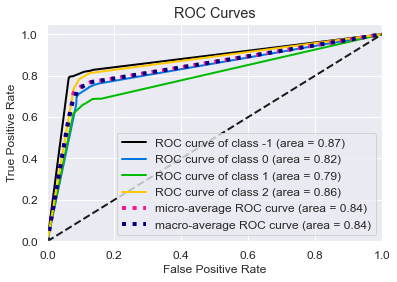

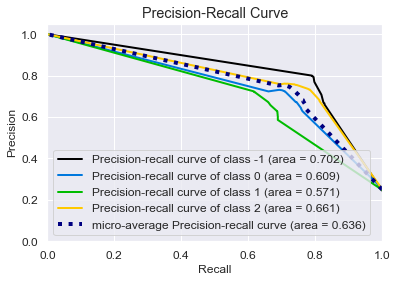

In [84]:
# traing models 
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight=weights)
dtc.fit(x_train, y_train)

y_score = dtc.predict_proba(x_valid)
y_pred_dtc = dtc.predict(x_valid)

# calculating the f1 score for the x_test set
print("f1 score :", f1_score(y_valid, y_pred_dtc,
                            pos_label='positive',
                             average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred_dtc)
print(cm)


# Plot metrics 
plot_roc(y_valid, y_score)
plt.show()
    
plot_precision_recall(y_valid, y_score)
plt.show()


####  comment on the result!!!



### 5.4 SVC Classifier

f1 score : 0.813718305730617
[[1384  198   52   37]
 [  77 1443  119  102]
 [  40  166 1278  211]
 [  24  155   90 1447]]


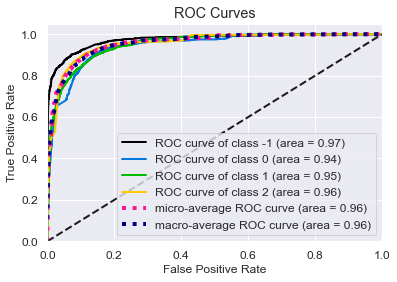

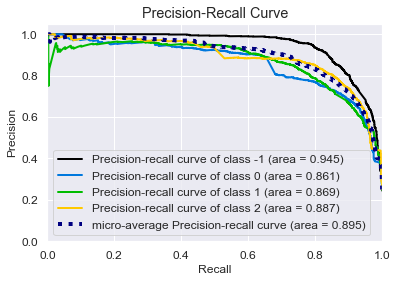

In [85]:
from sklearn.svm import SVC

svc = SVC(probability=True, class_weight=weights)
svc.fit(x_train, y_train)

y_score = svc.predict_proba(x_valid)
y_pred_svc = svc.predict(x_valid)


# calculating the f1 score for the x_test set
print("f1 score :", f1_score(y_valid, y_pred_svc,
                            pos_label='positive',
                             average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred_svc)
print(cm)


# Plot metrics 
plot_roc(y_valid, y_score)
plt.show()
    
plot_precision_recall(y_valid, y_score)
plt.show()

####  comment on the result!!!



### 5.5 Random Forest Classifier

f1 score : 0.8176755093067566
[[1433   95  102   41]
 [  61 1405  171  104]
 [  48  114 1295  238]
 [  23   80  167 1446]]


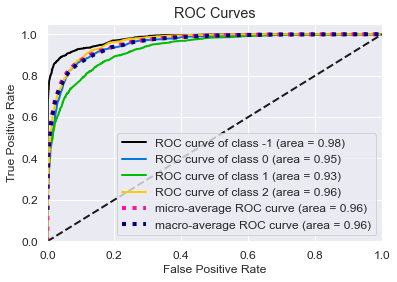

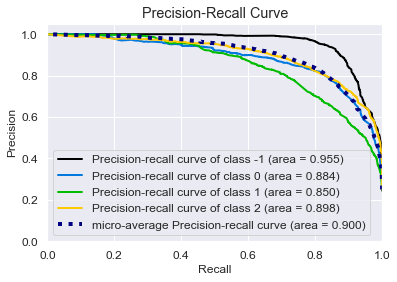

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight = weights, n_estimators=200)
rf.fit(x_train, y_train)

y_score = rf.predict_proba(x_valid)
y_pred_rf = rf.predict(x_valid)


# calculating the f1 score for the x_test set
print("f1 score :", f1_score(y_valid, y_pred_rf,
                            pos_label='positive',
                             average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred_rf)
print(cm)


# Plot metrics 
plot_roc(y_valid, y_score)
plt.show()
    
plot_precision_recall(y_valid, y_score)
plt.show()

In [ ]:
## comment on the result

<a id="one"></a>
## 6. Model Performance
<a href=#cont>Back to Table of Contents</a>

---

<a id="six"></a>
## 7. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


<a id="six"></a>
## 8. Kaggle Model Submissions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


### 8.1 Logistic Regression

In [90]:
# renaming the test_data
test = test_data
# training the model with the whole data
lr.fit(x, y)
# make predictions for  target variable sing original test data
lr_sentiment = lr.predict(test)

# store predictions in a dataframe
sentiment = pd.DataFrame(lr_sentiment, columns = ['sentiment'])
# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test ['tweetid']})
# combine tweetid dataframe with the sentiment dataframe
lr_submission = tweetid.join(sentiment)
# write the result to a csv file
lr_submission.to_csv('lr_submission.csv', index = False)


IndexError: Index dimension must be <= 2

### 8.2 KNeighbors Classifier

In [91]:
# training the model with the whole data
knc.fit(x, y)

# make predictions for  target variable sing original test data
knc_sentiment = knc.predict(test)

# store predictions in a dataframe
sentiment = pd.DataFrame(knc_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
knc_submission = tweetid.join(sentiment)

# write the result to a csv file
knc_submission.to_csv('knc_submission.csv', index = False)

IndexError: Index dimension must be <= 2

### 8.3 Decision Tree Classifier

In [92]:
# training the model with the whole data
dtc.fit(x, y)

# make predictions for  target variable sing original test data
dtc_sentiment = dtc.predict(test)

# store predictions in a dataframe
sentiment = pd.DataFrame(dtc_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
dtc_submission = tweetid.join(sentiment)

# write the result to a csv file
dtc_submission.to_csv('dtc_submission.csv', index = False)


IndexError: Index dimension must be <= 2

### 8.4 SVC Classifier

In [ ]:
# training the model with the whole data
svc.fit(x, y)

# make predictions for  target variable sing original test data
svc_sentiment = svc.predict(test)

# store predictions in a dataframe
sentiment = pd.DataFrame(svc_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
svc_submission = tweetid.join(sentiment)

# write the result to a csv file
svc_submission.to_csv('svc_submission.csv', index = False)

### 8.5 Random Forest Classifier

In [ ]:
# training the model with the whole data
rf.fit(x, y)

# make predictions for  target variable sing original test data
rf_sentiment = rf.predict(test)

# store predictions in a dataframe
sentiment = pd.DataFrame(rf_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
rf_submission = tweetid.join(sentiment)

# write the result to a csv file
rf_submission.to_csv('rf_submission.csv', index = False)